No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{}
{'Period9': []}
{'Period9': [], 'Period7': []}
{'Period9': [], 'Period7': [], 'Period6': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': [], 'Period12': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': [], 'Period12': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': [], 'Period12': [], 'Period13': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': [], 'Period12': [], 'Period13': [], 'Period14': []}
{'Period9': [], 'Period7': [], 'Period6': [], 'Period1': [], 'Period8': [], 'Period15': [], 'Period12': [], 'Period13': [], 'Period14': [], 'Period4': []}
{'Period9': [], 'Period7': [], 'Period6'

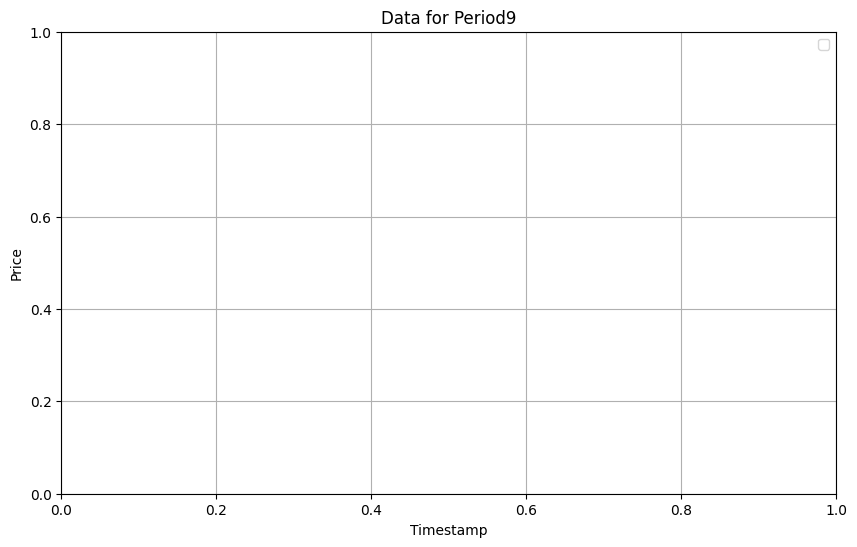

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


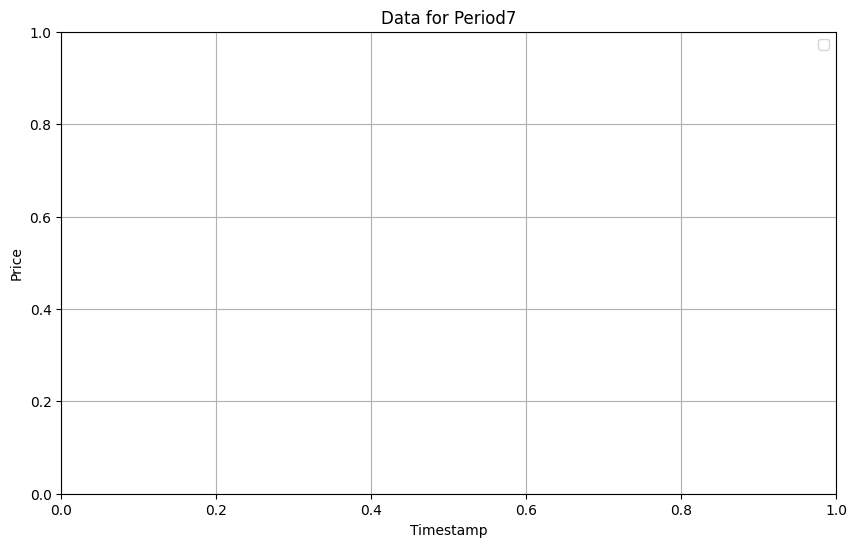

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


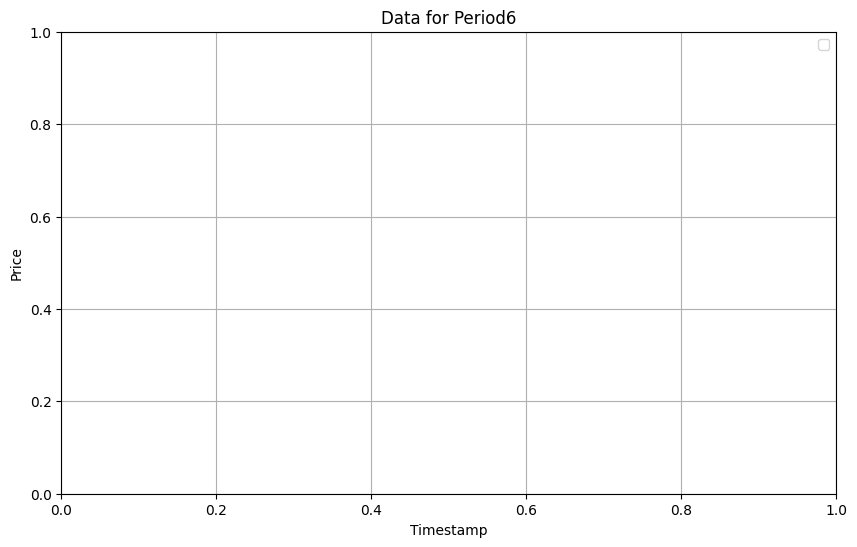

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


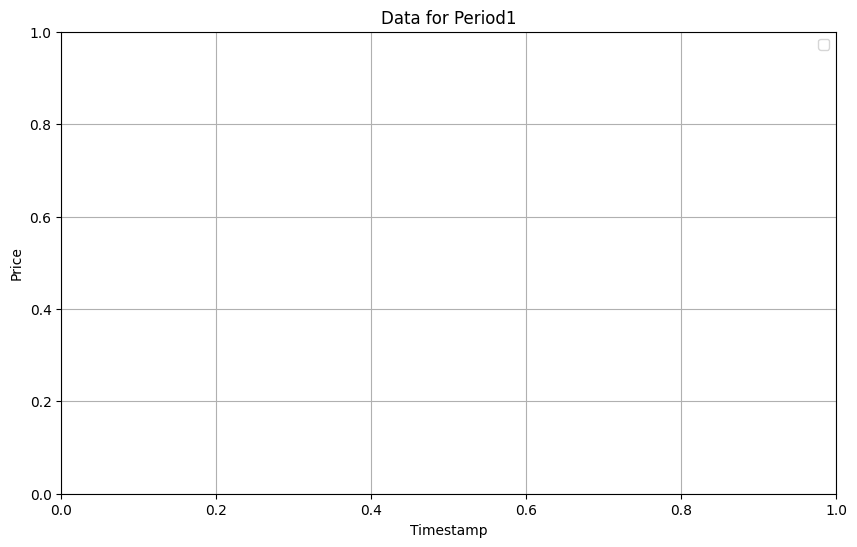

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


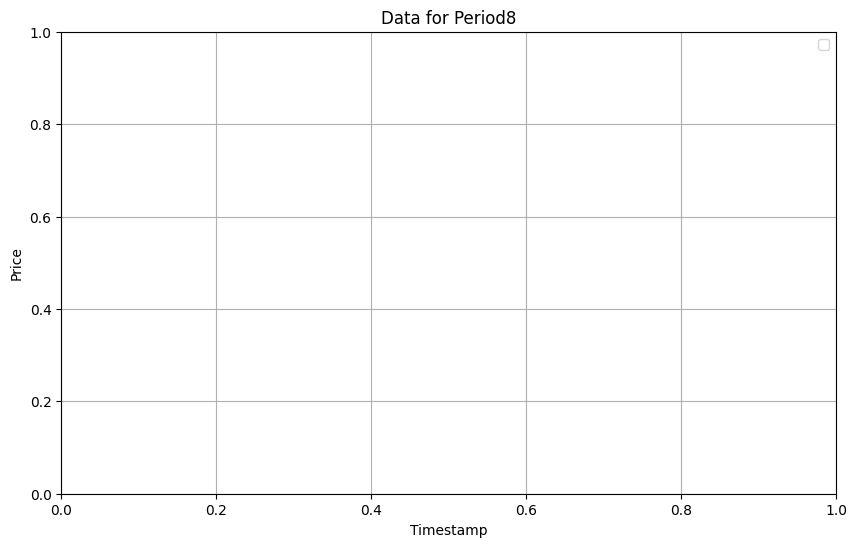

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


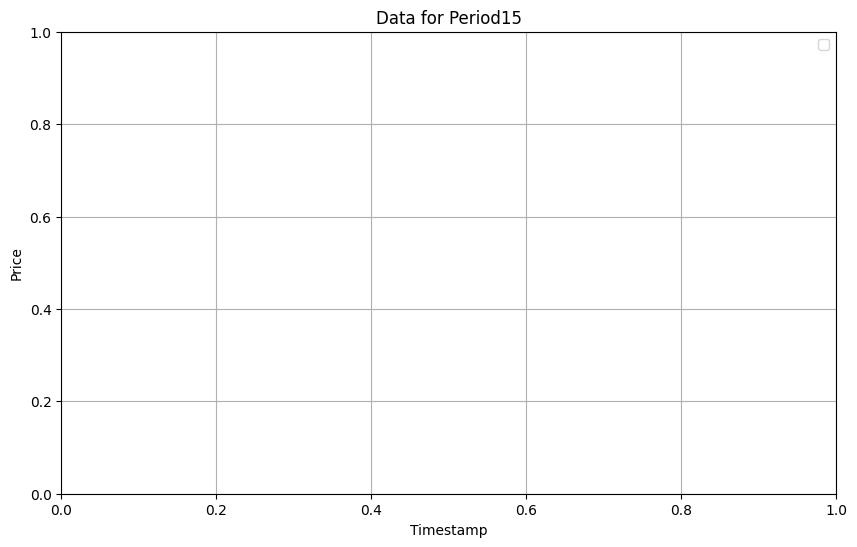

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


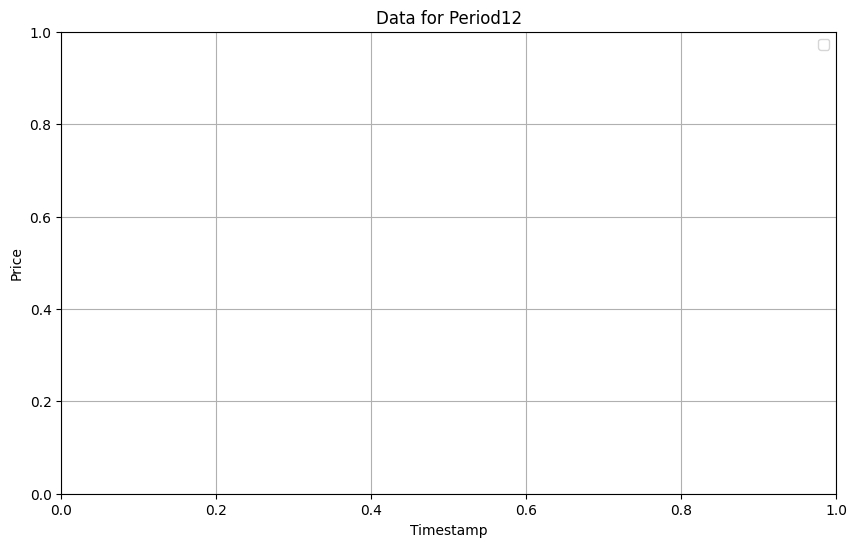

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


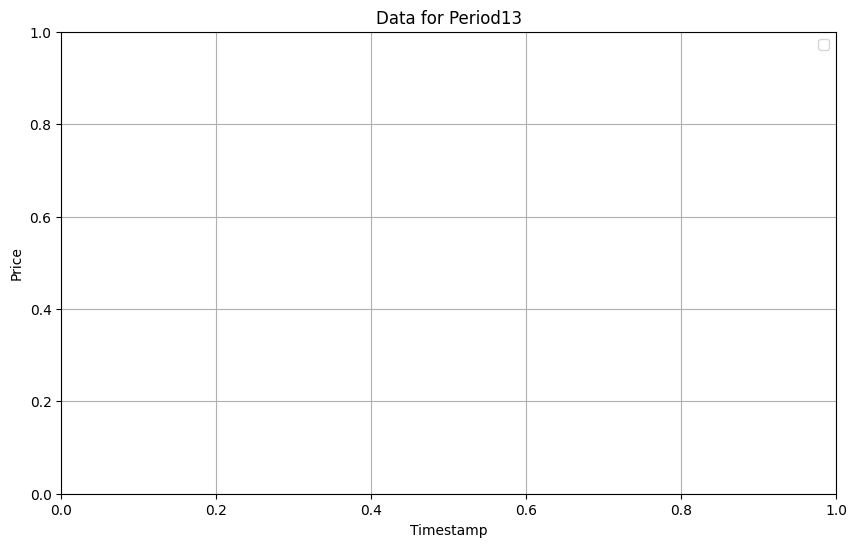

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


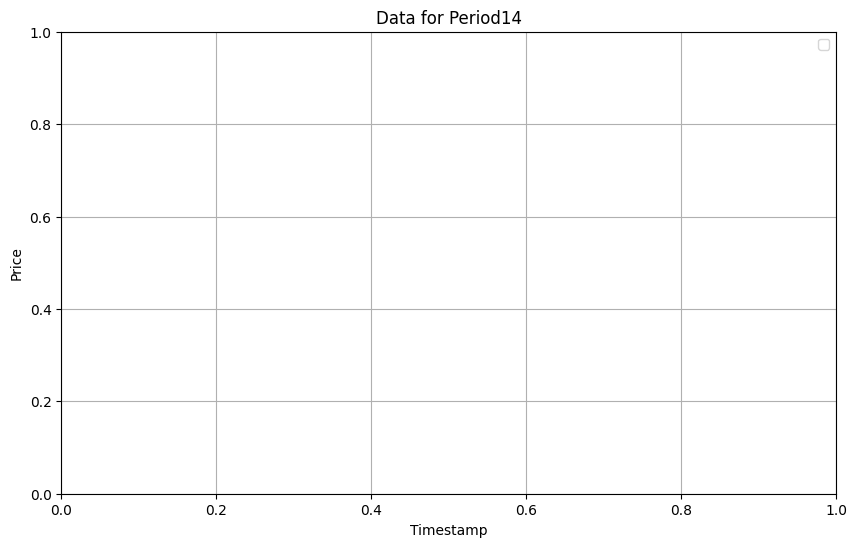

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


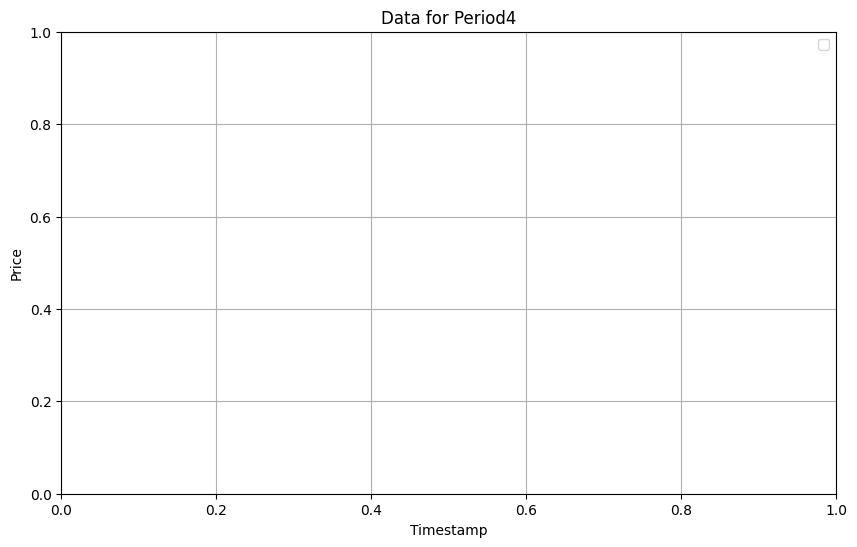

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


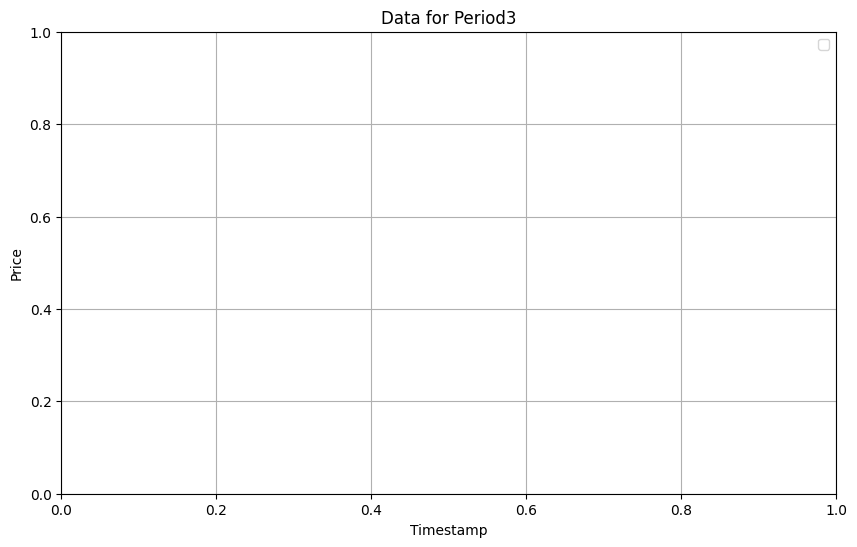

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


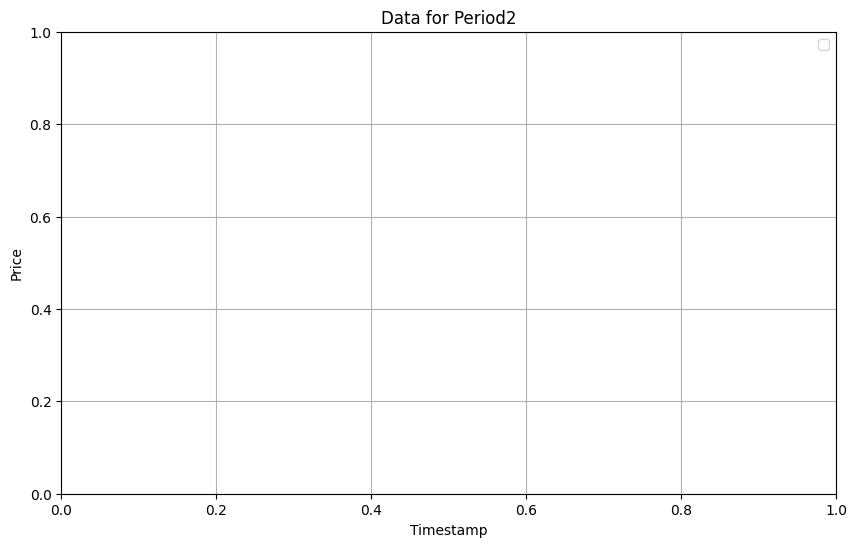

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


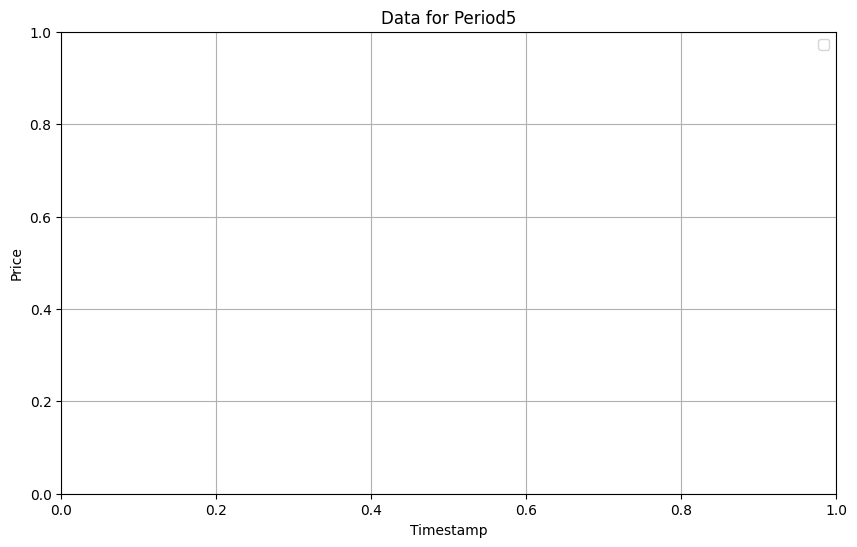

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


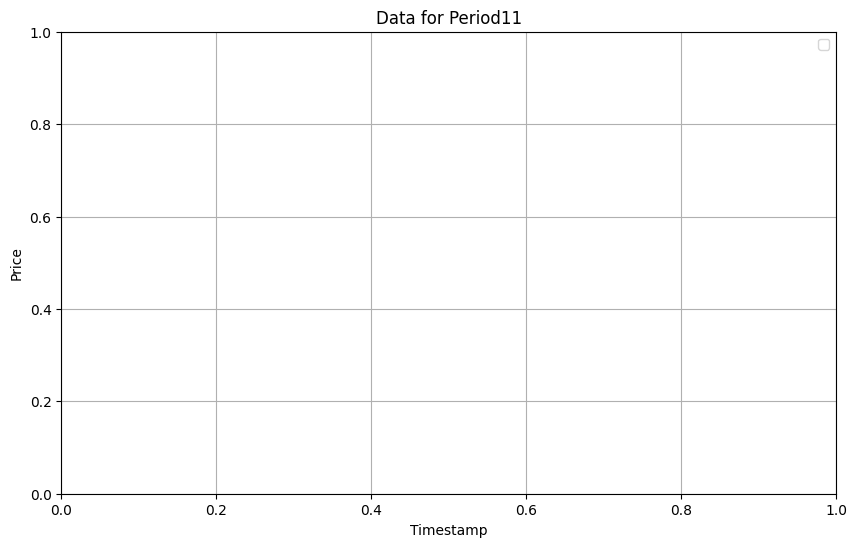

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


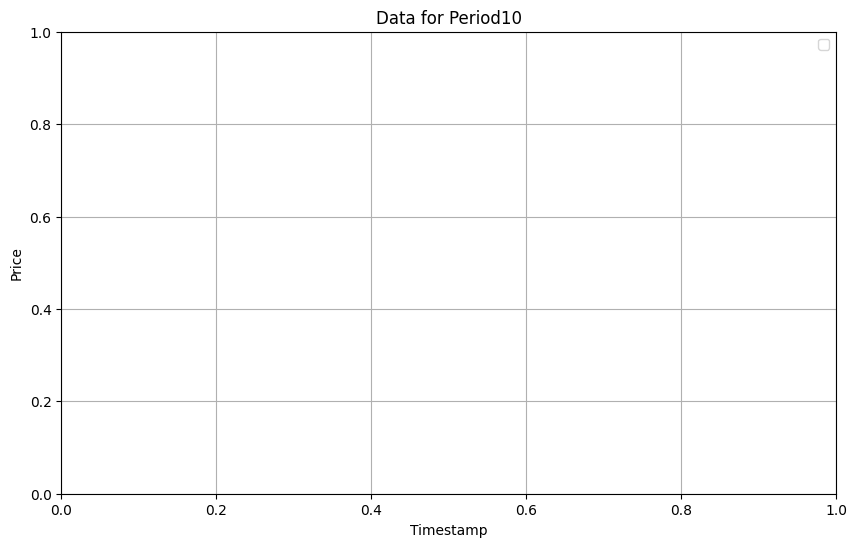

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_and_plot_data(root_dir):
    period_data = {}  # Dictionary to hold data for each period
    
    for period in os.listdir(root_dir):
        period_path = os.path.join(root_dir, period)
        period_path = os.path.join(root_dir, period)
        print(period_data)
        if os.path.isdir(period_path):  # Check if it's a directory
            period_data[period] = []

            for folder in os.listdir(period_path):
                folder_path = os.path.join(period_path, folder)
                if os.path.isdir(folder_path):
                    for file in os.listdir(folder_path):
                        if "__" in file and file.endswith(".csv"):  # Check for '__{letter}' files
                            file_path = os.path.join(folder_path, file)
                            # Read the CSV data
                            data = pd.read_csv(file_path)
                            period_data[period].append(data)
    
    # Plot the data
    for period, data_list in period_data.items():
        plt.figure(figsize=(10, 6))
        for data in data_list:
            plt.plot(data['timestamp'], data['price'], label=f"{period} {data_list.index(data)}")
        plt.title(f"Data for {period}")
        plt.xlabel("Timestamp")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.show()

# Provide the root directory where the TrainingData folder resides
root_directory = "../TrainingData"
read_and_plot_data(root_directory)